In [3]:
%pip install matplotlib numpy pandas seaborn scikit-learn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


# Data Cleaning

Displaying the Dataframe

In [4]:
df = pd.read_csv("./Spotify Most Streamed Songs.csv")
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


The following code will:
- Group the different columns into better recognizable sections
- rename ambigious column names (**streams => spotify_streams**)
- dropped a column that gave no meaningful information (**cover_url**)
- make the mode column be in 0 an 1 for better data analysis (**Major = 0, Minor = 1**)
- make the key column be from 0 to 12 for better data analysis (**A is 0, G# = 12, and NaN = NaN**)
- changes the type of the in_deezer_playlist, in_shazam_charts, streams from obj to float64

In [147]:
df = df.rename(columns={'streams': 'spotify_streams'})
df = df.drop('cover_url', axis=1)
df = df.set_index(['track_name', 'artist(s)_name'])
# Defining groups of 
date_cols = ['released_year', 'released_month', 'released_day']
spotify_col = ['in_spotify_playlists', 'in_spotify_charts', 'spotify_streams']
apple_col = ['in_apple_playlists', 'in_apple_charts']
deezer_col = ['in_deezer_playlists', 'in_deezer_charts']
playlists_col = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
charts_col = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
musical_info_col = ['bpm', 'key', 'mode']

In [148]:
df['mode'] = df['mode'].map({'Major': 0, 'Minor': 1}) 
mode_dict = {0: 'Major', 1: 'Minor'}

In [149]:
df["key"] = df['key'].map({
    'A': 0,
    'A#': 1,
    'B': 2,
    'C': 3,
    'C#': 4,
    'D': 5,
    'D#': 6,
    'E': 7,
    'F': 8,
    'F#': 9,
    'G': 10,
    'G#': 11,
    np.nan: np.nan
})
key_dict = {
    0 : 'A',
    1 : 'A#',
    2 : 'B',
    3 : 'C',
    4 : 'C#',
    5 : 'D',
    6 : 'D#',
    7 : 'E',
    8 : 'F',
    9 : 'F#',
    10 : 'G',
    11 : 'G#',
    np.nan : np.nan
}

Replacing this typo with Not a Number for making sure all values are the same.

In [8]:
df = df.replace('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3', np.nan)


In [151]:
df['spotify_streams'] = pd.to_numeric(df['spotify_streams'].str.replace(',',''), errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].str.replace(',',''), errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].str.replace(',',''), errors='coerce')

# Data Analysis

Having a histogram of all the different columns

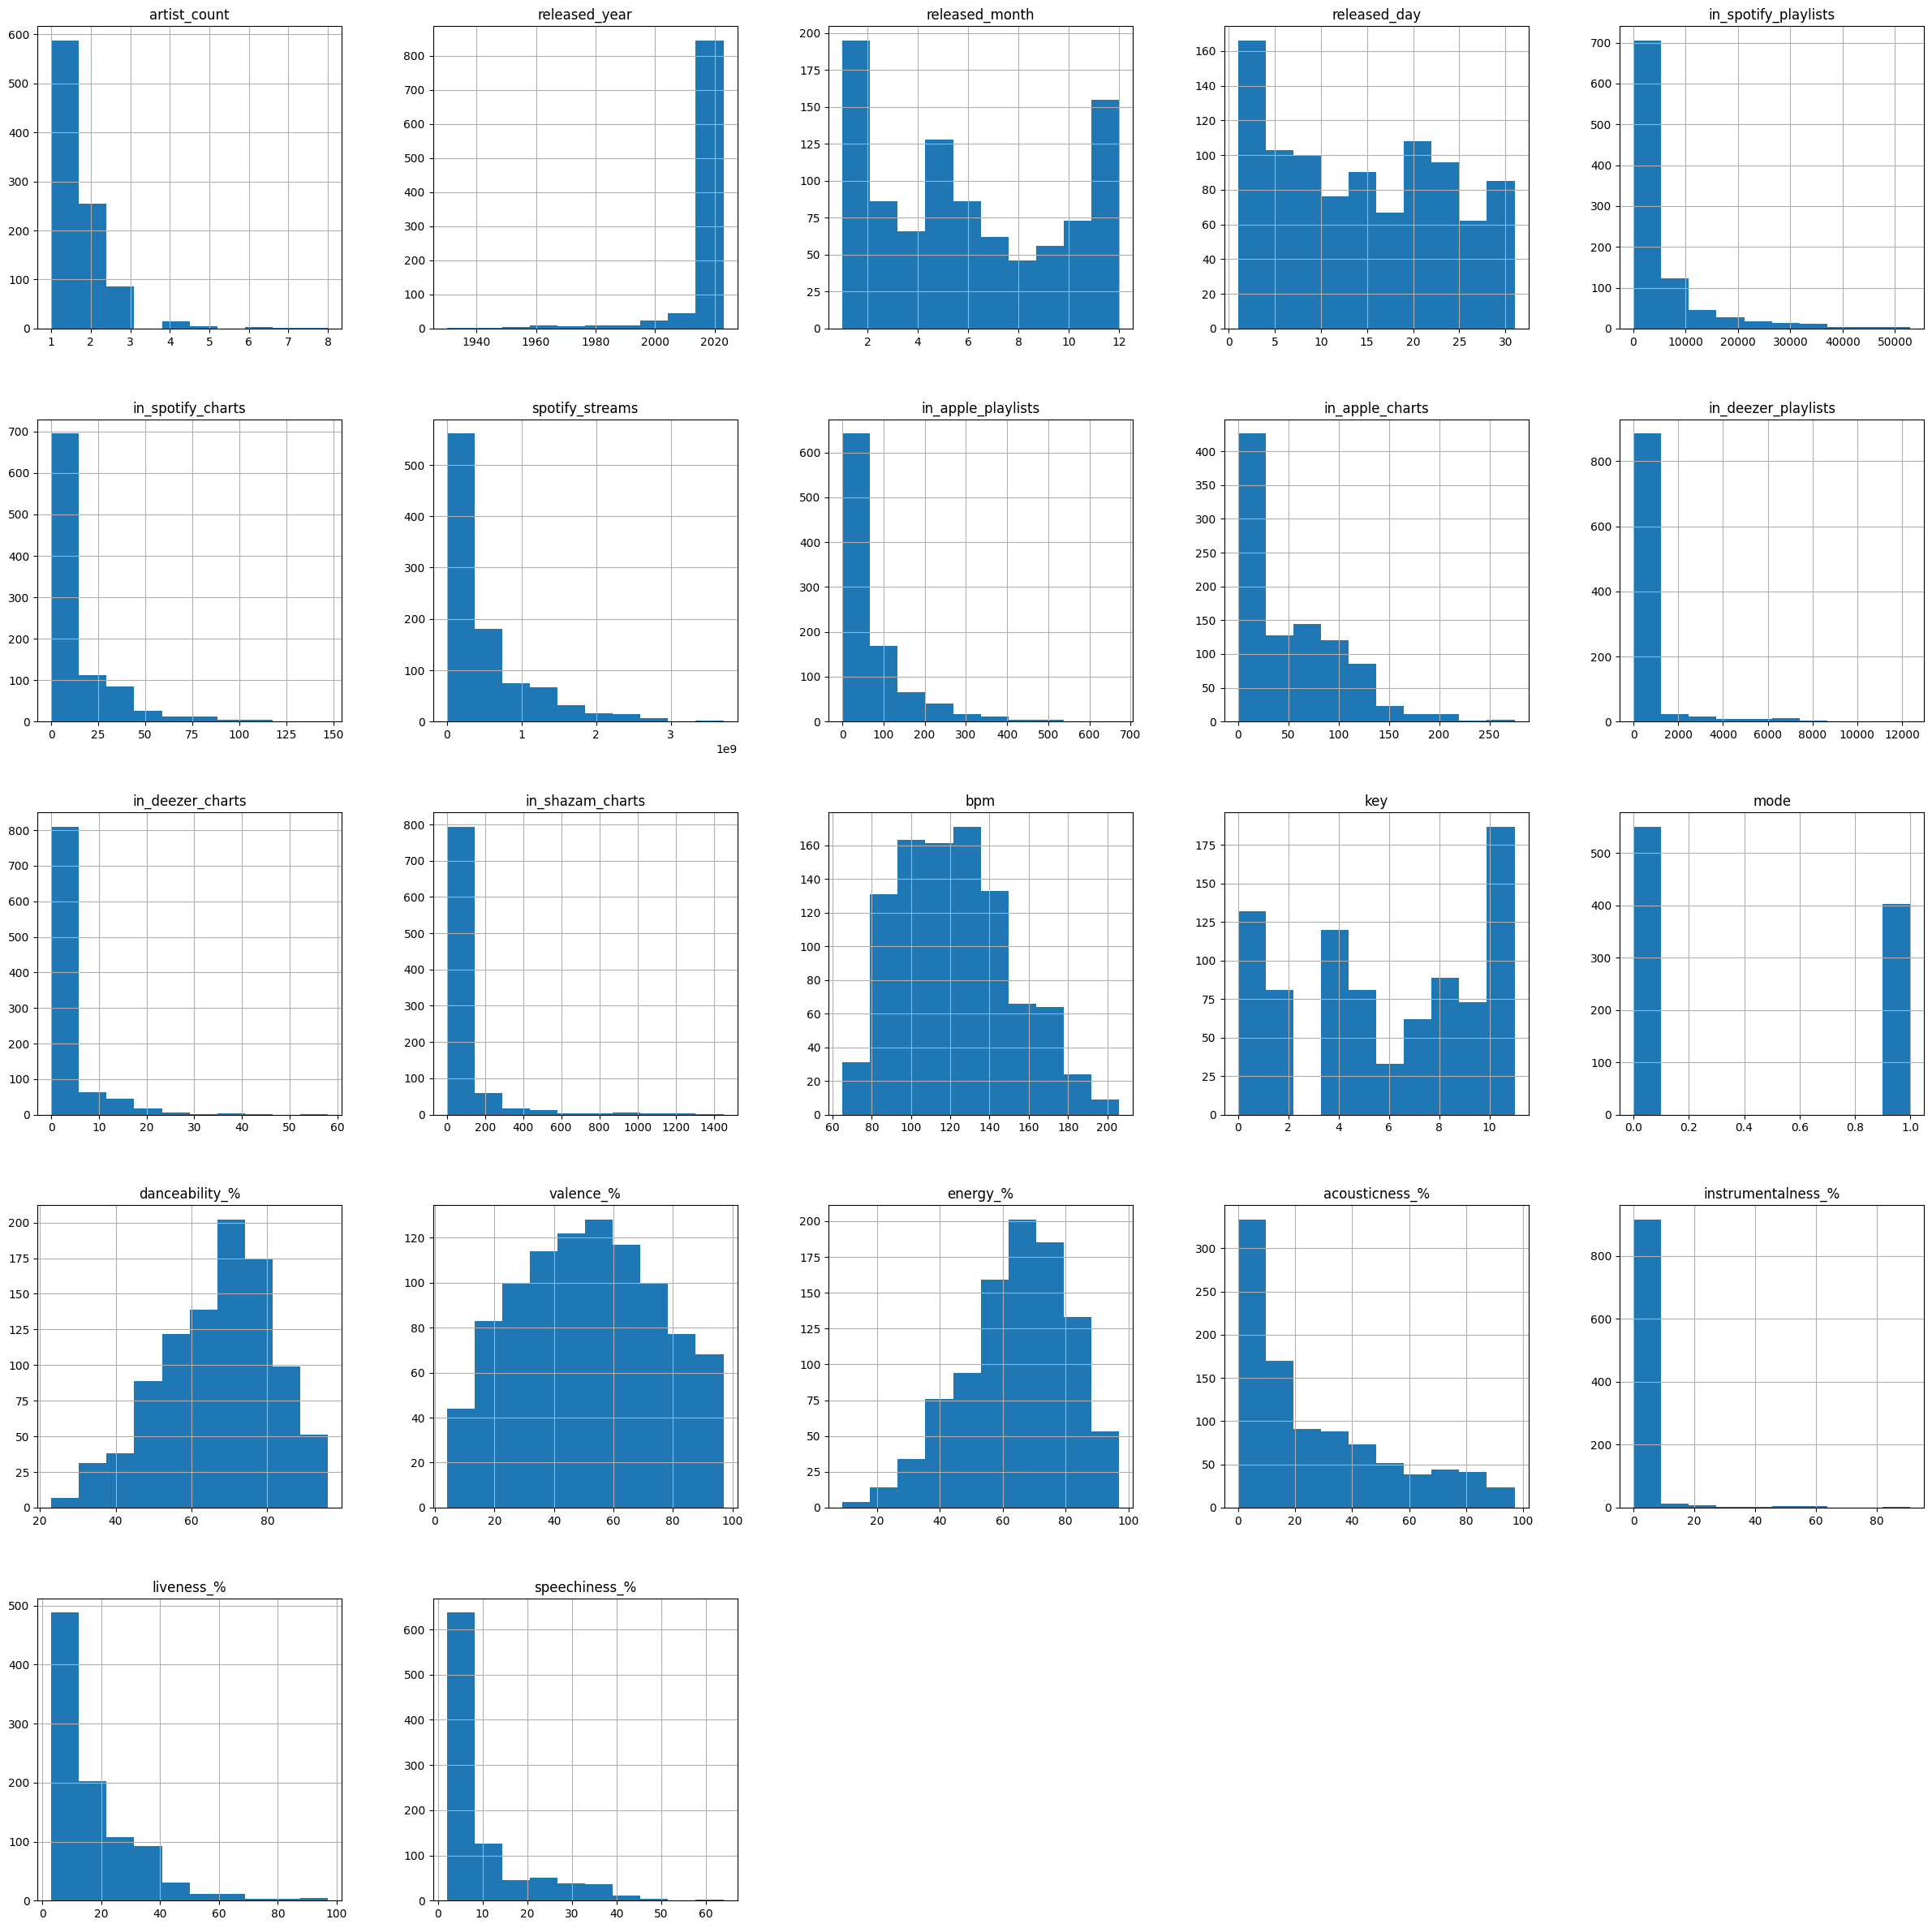

In [152]:
df.hist(figsize=(30,30))
plt.show()

In [153]:
df['average_playlists'] = df[playlists_col].mean(axis=1)
df['average_chart'] = df[charts_col].mean(axis=1)

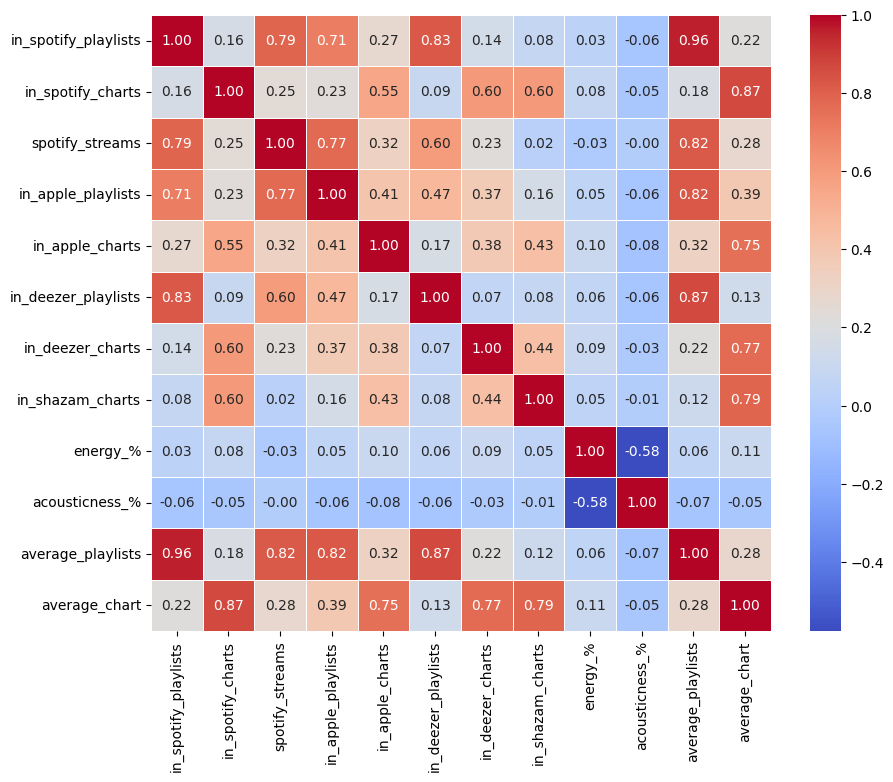

In [186]:
def correlation_matrix():
    corr_matrix = df.select_dtypes(include = ['float64', 'int64']).corr()
    mask = np.abs(corr_matrix) >= 0.5
    np.fill_diagonal(mask.values, False)
    cols_to_keep = mask.any()
    cols_to_keep = cols_to_keep[cols_to_keep].index
    corr_filter = corr_matrix.loc[cols_to_keep, cols_to_keep]
    
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_filter, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
    plt.show()
    
correlation_matrix()

After seeing the 1 correlation further investigation was neeeded so I normalized the data and then redid the average rows with that data.

In [175]:
scaler = StandardScaler()
df_n = pd.DataFrame(scaler.fit_transform(df.copy()), columns=df.columns,  index=df.index)

In [180]:
df['average_playlists'] = df_n[playlists_col].mean(axis=1)
df['average_chart'] = df_n[charts_col].mean(axis=1)

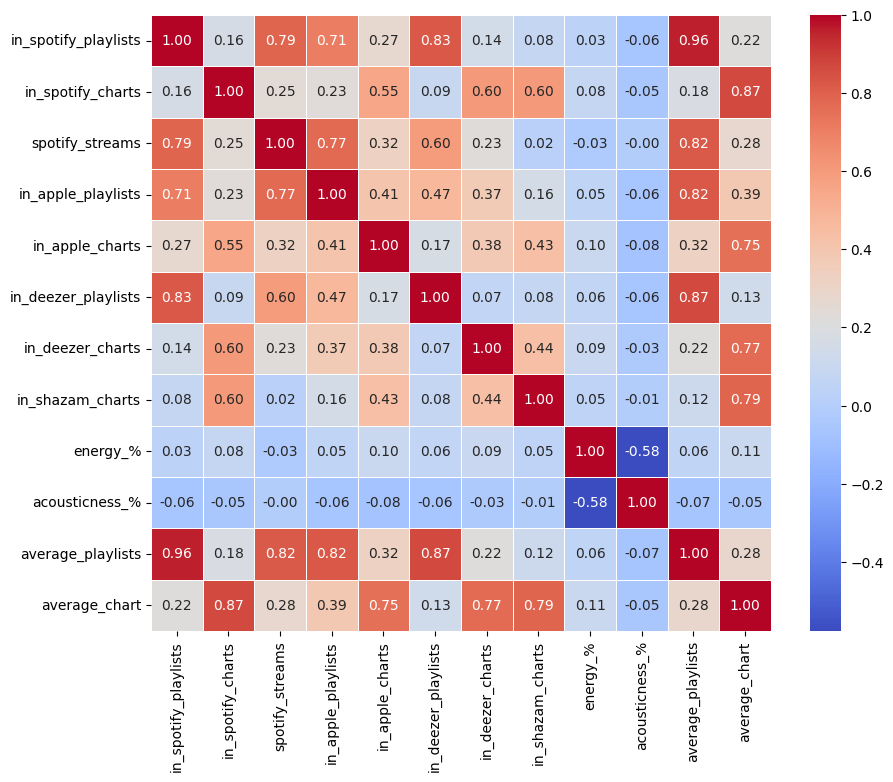

In [187]:
correlation_matrix()

As seen above now they are no longer as big of a correlation as before.

# IDK what to call this section

In [192]:
energy_acoustic_df = df[['energy_%', 'acousticness_%']] / 100
energy_acoustic_df

,,energy_%,acousticness_%
track_name,artist(s)_name,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",0.83,0.31
LALA,Myke Towers,0.74,0.07
vampire,Olivia Rodrigo,0.53,0.17
Cruel Summer,Taylor Swift,0.72,0.11
WHERE SHE GOES,Bad Bunny,0.80,0.14
...,...,...,...
My Mind & Me,Selena Gomez,0.39,0.57
Bigger Than The Whole Sky,Taylor Swift,0.24,0.83
A Veces (feat. Feid),"Feid, Paulo Londra",0.67,0.04


This is the playlists and charts together n_ is normalized

In [199]:
playlists_charts_df = df[playlists_col + charts_col]
n_playlists_charts_df = pd.DataFrame(MinMaxScaler().fit_transform(df[playlists_col+charts_col].copy()), columns=playlists_col+charts_col, index=df.index)
playlists_charts_df

,,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
track_name,artist(s)_name,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",553,43,45,147,263,10,826.0
LALA,Myke Towers,1474,48,58,48,126,14,382.0
vampire,Olivia Rodrigo,1397,94,91,113,207,14,949.0
Cruel Summer,Taylor Swift,7858,116,125,100,207,12,548.0
WHERE SHE GOES,Bad Bunny,3133,84,87,50,133,15,425.0
...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,953,61,37,0,13,1,0.0
Bigger Than The Whole Sky,Taylor Swift,1180,4,8,0,0,0,0.0
A Veces (feat. Feid),"Feid, Paulo Londra",573,2,7,0,0,0,0.0


In [198]:
n_playlists_charts_df

,,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
track_name,artist(s)_name,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",0.009874,0.063988,0.003639,1.000000,0.956364,0.172414,0.569263
LALA,Myke Towers,0.027295,0.071429,0.004690,0.326531,0.458182,0.241379,0.263267
vampire,Olivia Rodrigo,0.025838,0.139881,0.007358,0.768707,0.752727,0.241379,0.654032
Cruel Summer,Taylor Swift,0.148051,0.172619,0.010108,0.680272,0.752727,0.206897,0.377671
WHERE SHE GOES,Bad Bunny,0.058676,0.125000,0.007035,0.340136,0.483636,0.258621,0.292901
...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,0.017440,0.090774,0.002992,0.000000,0.047273,0.017241,0.000000
Bigger Than The Whole Sky,Taylor Swift,0.021734,0.005952,0.000647,0.000000,0.000000,0.000000,0.000000
A Veces (feat. Feid),"Feid, Paulo Londra",0.010252,0.002976,0.000566,0.000000,0.000000,0.000000,0.000000


Replacing 0s with nan for better results

In [ ]:
mod_playlists_charts_df = playlists_charts_df.replace(0, np.nan)
mod_playlists_charts_df

,,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
track_name,artist(s)_name,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",553,43.0,45.0,147.0,263.0,10.0,826.0
LALA,Myke Towers,1474,48.0,58.0,48.0,126.0,14.0,382.0
vampire,Olivia Rodrigo,1397,94.0,91.0,113.0,207.0,14.0,949.0
Cruel Summer,Taylor Swift,7858,116.0,125.0,100.0,207.0,12.0,548.0
WHERE SHE GOES,Bad Bunny,3133,84.0,87.0,50.0,133.0,15.0,425.0
...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,953,61.0,37.0,NaN,13.0,1.0,NaN
Bigger Than The Whole Sky,Taylor Swift,1180,4.0,8.0,NaN,NaN,NaN,NaN
A Veces (feat. Feid),"Feid, Paulo Londra",573,2.0,7.0,NaN,NaN,NaN,NaN


In [208]:
n_mod_playlists_charts_df = pd.DataFrame(MinMaxScaler().fit_transform(mod_playlists_charts_df[playlists_col+charts_col].copy()), columns=playlists_col+charts_col, index=df.index)
n_mod_playlists_charts_df

,,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
track_name,artist(s)_name,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",0.009874,0.062593,0.003558,1.000000,0.956204,0.157895,0.568966
LALA,Myke Towers,0.027295,0.070045,0.004609,0.321918,0.456204,0.228070,0.262759
vampire,Olivia Rodrigo,0.025838,0.138599,0.007278,0.767123,0.751825,0.228070,0.653793
Cruel Summer,Taylor Swift,0.148051,0.171386,0.010027,0.678082,0.751825,0.192982,0.377241
WHERE SHE GOES,Bad Bunny,0.058676,0.123696,0.006955,0.335616,0.481752,0.245614,0.292414
...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,0.017440,0.089419,0.002911,NaN,0.043796,0.000000,NaN
Bigger Than The Whole Sky,Taylor Swift,0.021734,0.004471,0.000566,NaN,NaN,NaN,NaN
A Veces (feat. Feid),"Feid, Paulo Londra",0.010252,0.001490,0.000485,NaN,NaN,NaN,NaN


Finding correlation Matrix

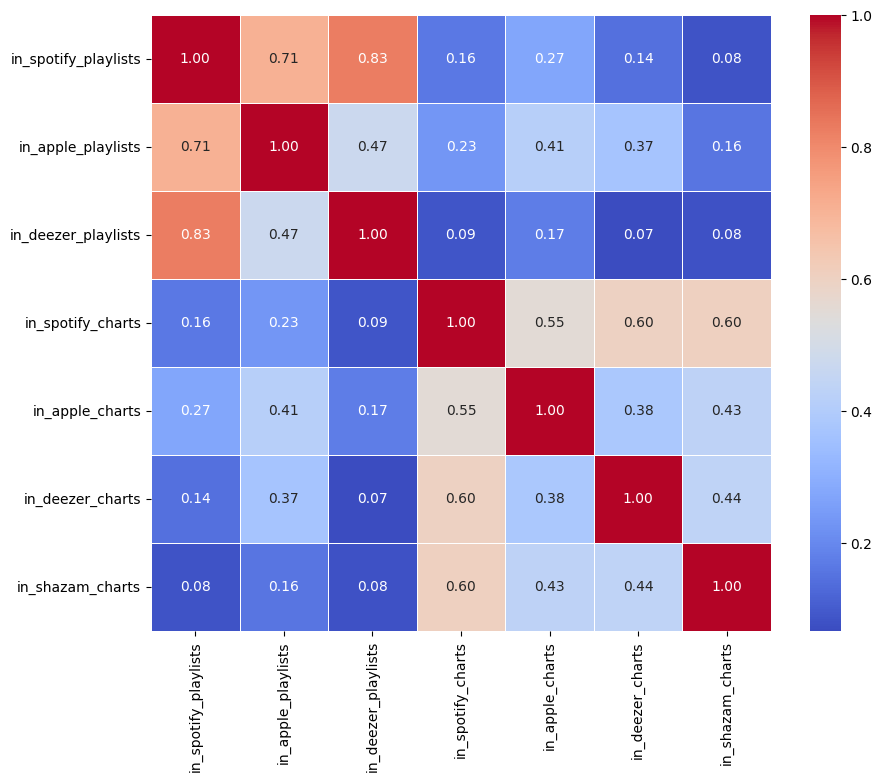

In [ ]:
corr_matrix = playlists_charts_df.select_dtypes(include = ['float64', 'int64']).corr()
    
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.show()

Finding correlation matrix with streams added

C:\Users\alago\AppData\Local\Temp\ipykernel_16952\1798790725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlists_charts_df['spotify_streams'] = df['spotify_streams']


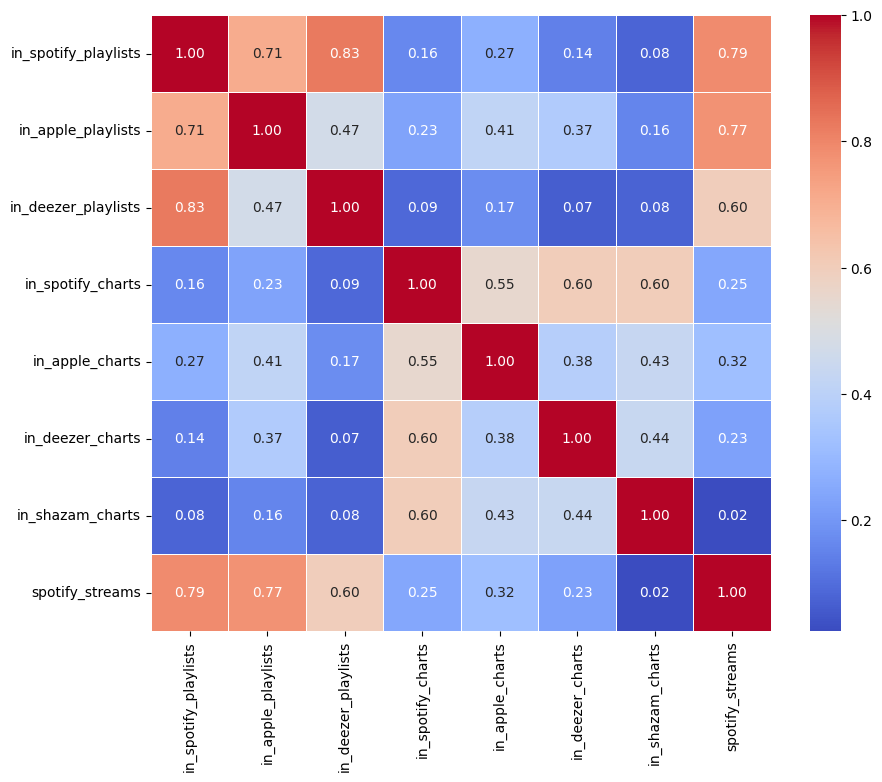

In [214]:
playlists_charts_df['spotify_streams'] = df['spotify_streams']
corr_matrix = playlists_charts_df.select_dtypes(include = ['float64', 'int64']).corr()
    
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.show()

Doing the same but with removed nan

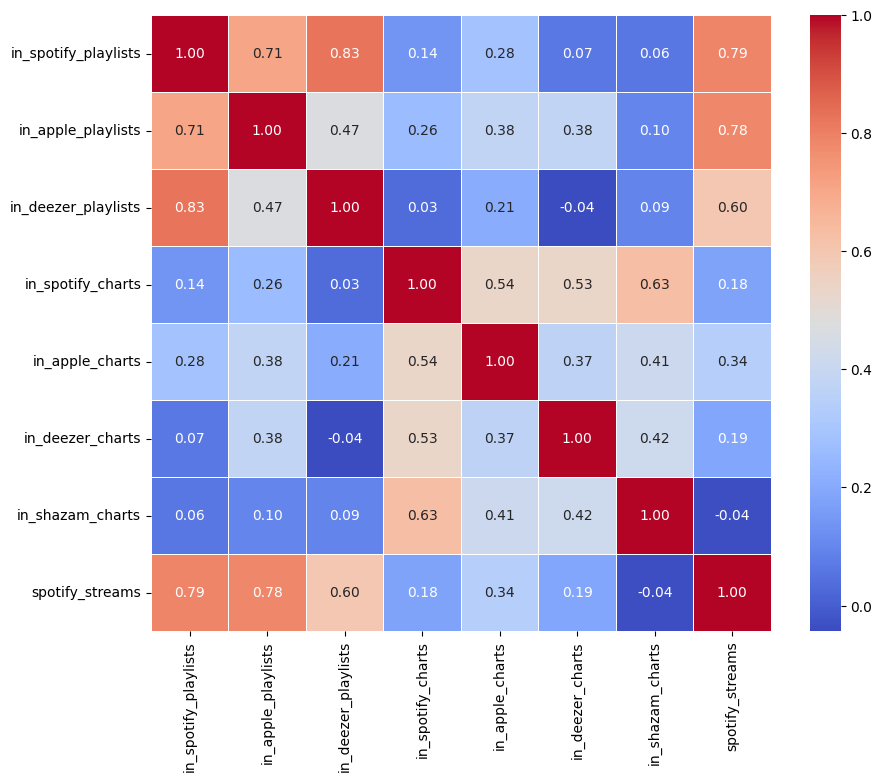

In [215]:
mod_playlists_charts_df = playlists_charts_df.replace(0, np.nan)
corr_matrix = mod_playlists_charts_df.select_dtypes(include = ['float64', 'int64']).corr()
    
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.show()
